<a href="https://colab.research.google.com/github/sujanian3179/SVM-Project-Course-/blob/main/Chatter_Classification_by_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def sha_entropy(x):
  y=np.power(x,2)
  y1=np.sum(y)
  pe=y/y1
  entropy=-np.sum(pe*np.log(np.power(x,2)))
  return entropy
#Shannon Entropy

In [ ]:
import pandas as pd
import math
import numpy as np
dataframe_exp=[]
dataframe_cut_skew=[]
dataframe_acc_skew=[]
dataframe_cut_kurtosis=[]
dataframe_acc_kurtosis=[]
dataframe_cut_shapefactor=[]
dataframe_acc_shapefactor=[]
dataframe_cut_entropy = []
dataframe_acc_entropy = []
for i in range (1,65):
  try:
    cut_url='/content/drive/MyDrive/Cutting Force/Cutting Force/'+'E'+str(i)+'.csv'
    acc_url='/content/drive/MyDrive/Acceleration Data/'+'E'+str(i)+'.csv'
    df_cut=pd.read_csv (cut_url,header=None)
    df_acc=pd.read_csv (acc_url,header=None)
    df_cut.rename(columns={0: 'fx', 1: 'fy',2:'fz'}, inplace=True)
    df_acc.rename(columns={0:'time',1: 'ax', 2: 'ay',3:'az'}, inplace=True)
    df_cut['fnet_square']=np.sqrt(df_cut['fx']*df_cut['fx']+df_cut['fy']*df_cut['fy']+df_cut['fz']*df_cut['fz'])
    df_acc['anet_square']=np.sqrt(df_acc['ax']*df_acc['ax']+df_acc['ay']*df_acc['ay'])
    dataframe_exp.append(i)
    #shape factor, kurtosis, skewness
    dataframe_cut_skew.append(df_cut['fnet_square'].skew())
    dataframe_acc_skew.append(df_acc['anet_square'].skew())
    dataframe_cut_kurtosis.append(df_cut['fnet_square'].kurtosis())
    dataframe_acc_kurtosis.append(df_acc['anet_square'].kurtosis())
    dataframe_cut_shapefactor.append((np.mean(df_cut['fnet_square']) ** 2) / np.var(df_cut['fnet_square']))
    dataframe_acc_shapefactor.append((np.mean(df_acc['anet_square']) ** 2) / np.var(df_acc['anet_square']))
    dataframe_cut_entropy.append(sha_entropy(df_cut['fnet_square']))
    dataframe_acc_entropy.append(sha_entropy(df_acc['anet_square']))
  except Exception as e:
    continue
dict = {'exp': dataframe_exp, 'cut_skew': dataframe_cut_skew, 'acc_skew': dataframe_acc_skew,'cut_kurtosis': dataframe_cut_kurtosis,'acc_kurtosis': dataframe_acc_kurtosis,
        'cut_shapefactor':dataframe_cut_shapefactor,'acc_shapefactor':dataframe_acc_shapefactor,'cut_entropy':dataframe_cut_entropy,'acc_entropy':dataframe_acc_entropy}
df1=pd.DataFrame(dict)
df1.head(11)


,exp,cut_skew,acc_skew,cut_kurtosis,acc_kurtosis,cut_shapefactor,acc_shapefactor,cut_entropy,acc_entropy
0,1,-0.858804,0.155579,-0.355288,-1.032829,4.318275,4.462635,-9.337461,-2.256487
1,2,-1.235076,0.970646,0.181711,1.729330,6.294416,18.777979,-8.379936,-0.920294
2,3,-0.332734,-0.159346,0.081279,-0.007769,9.063055,189.033247,-7.314653,-1.676053
3,4,-0.066603,-0.057046,-1.600561,-0.170134,4.960843,323.058616,-9.246451,-1.937164
4,5,-0.511041,-0.046853,-1.272854,-0.196603,62.202637,115.814667,-12.393067,-1.027949
5,6,-0.199500,-0.116143,-1.544282,-0.038835,436.031497,202.151975,-13.108274,-1.439403
6,7,-0.460591,-0.046582,-0.647287,-0.442697,203.173613,39.991309,-9.575941,-0.664603
7,8,-0.774991,-0.040205,-1.285214,-0.386743,181.717252,9.306849,-10.746842,-0.194703
8,9,0.621643,0.682141,-1.572384,1.032121,176.031438,5.859873,-11.354514,-1.885358
9,10,-1.146299,0.048459,-0.187286,-0.752927,355.341775,18.186487,-12.938514,-0.281416


In [ ]:
df2=pd.read_excel('/content/drive/MyDrive/Turning Experimental Sheet (1).xlsx')
df=pd.merge(df2, df1, on='exp', how='left')
df.dropna(subset=['cut_skew', 'acc_skew'],inplace=True)
df.head(2)



,exp,doc,feed_rate,cut_vel,rod_dia,spindle_speed,Trial 1,Trial 2,Trial 3,Trial 4,...,Unnamed: 15,Unnamed: 16,cut_skew,acc_skew,cut_kurtosis,acc_kurtosis,cut_shapefactor,acc_shapefactor,cut_entropy,acc_entropy
0,1,0.1,0.05,50,24,663.145596,0.715,2.214,3.562,2.842,...,NaN,NaN,-0.858804,0.155579,-0.355288,-1.032829,4.318275,4.462635,-9.337461,-2.256487
1,2,0.1,0.05,100,24,1326.291192,0.399,0.468,0.341,0.346,...,NaN,NaN,-1.235076,0.970646,0.181711,1.729330,6.294416,18.777979,-8.379936,-0.920294


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split

# Load your DataFrame
df2 = df[["class","cut_skew","acc_skew","cut_kurtosis","acc_kurtosis","cut_shapefactor","acc_shapefactor","cut_entropy","acc_entropy"]]

# Separate features (X) and target class (y)
X = df2.drop("class", axis=1)  # Replace with actual class column name
y = df2["class"]

# Standardize features (recommended for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Feature selection
# Method 2: F-value test (applicable to both numerical and categorical features)
selector_f_classif = SelectKBest(f_classif, k=2)  # Select top 4 features based on F-value
fit_model_f_classif = selector_f_classif.fit(X_train, y_train)
X_train_f_classif = fit_model_f_classif.transform(X_train)
X_test_f_classif = fit_model_f_classif.transform(X_test)

# Print selected feature names (f_classif)
selected_features_f_classif = X.columns[selector_f_classif.get_support(indices=True)]
print("Selected Features (F-value):", selected_features_f_classif.tolist())

Selected Features (F-value): ['cut_skew', 'cut_kurtosis']


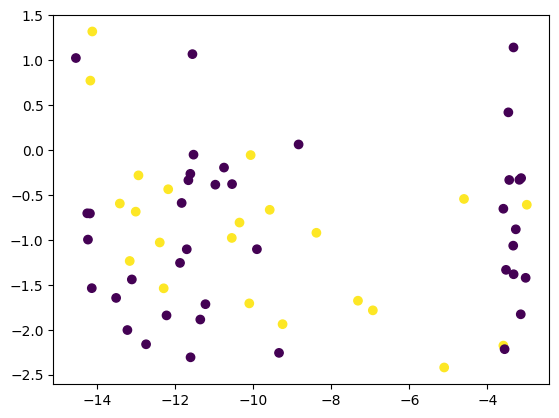

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['cut_entropy'],df['acc_entropy'],c=df['class'])

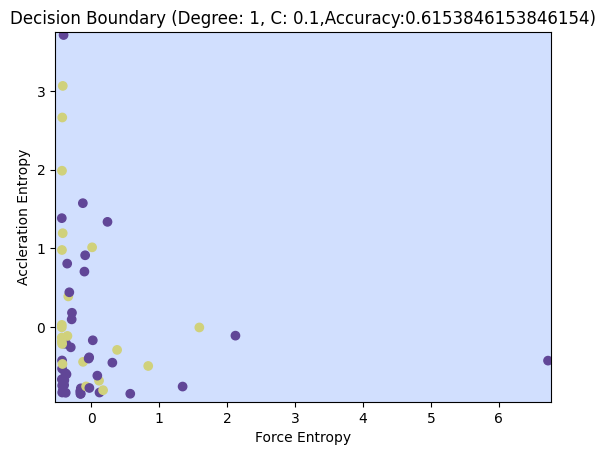

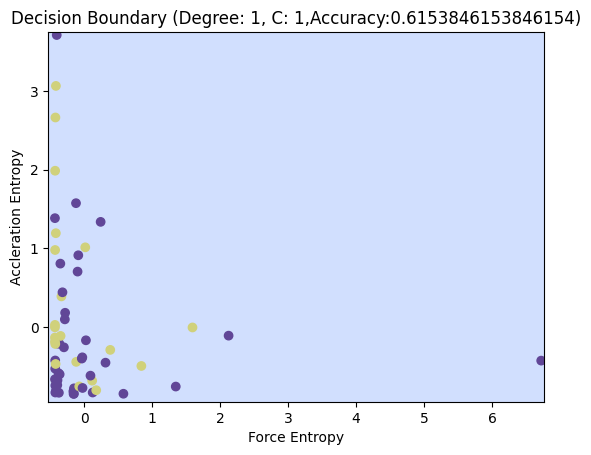

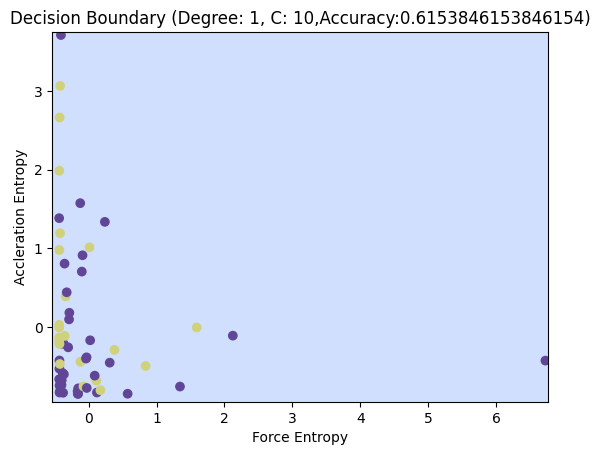

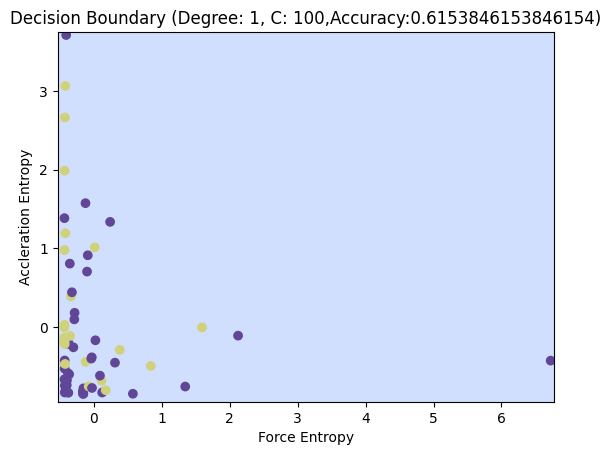

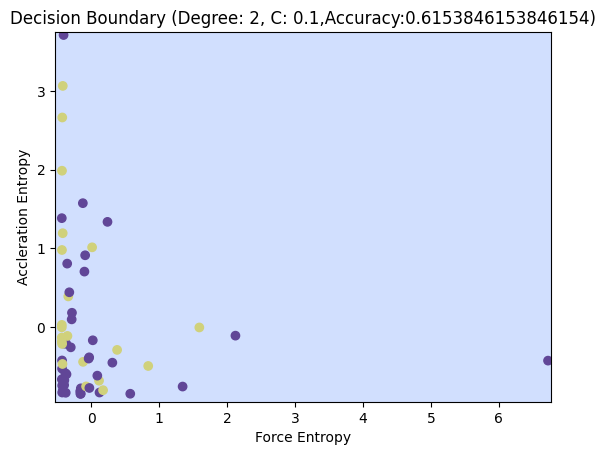

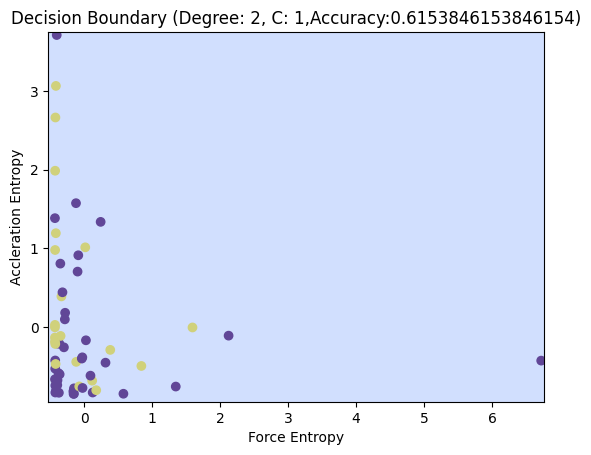

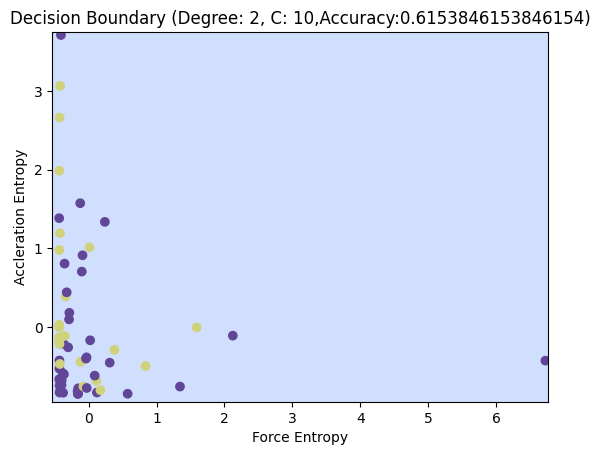

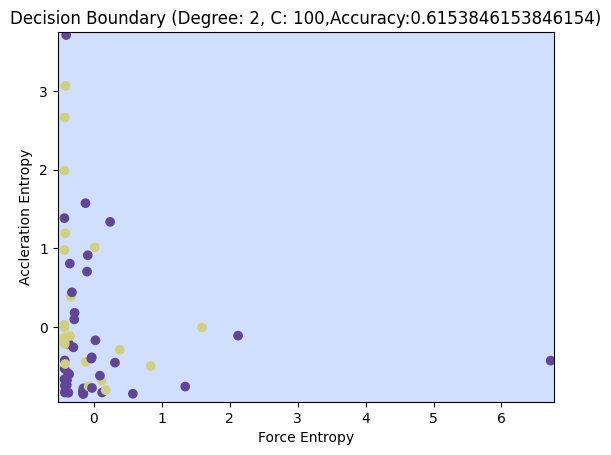

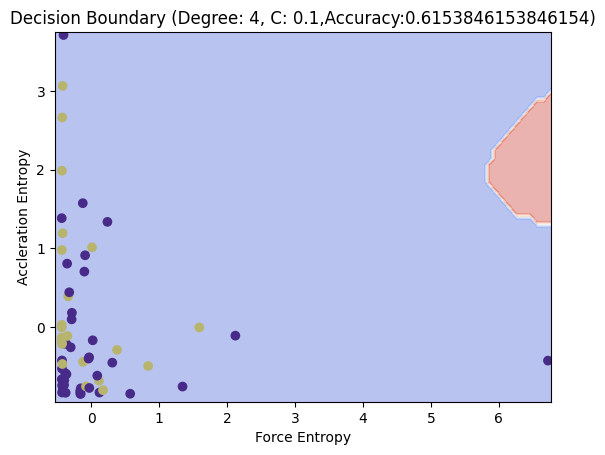

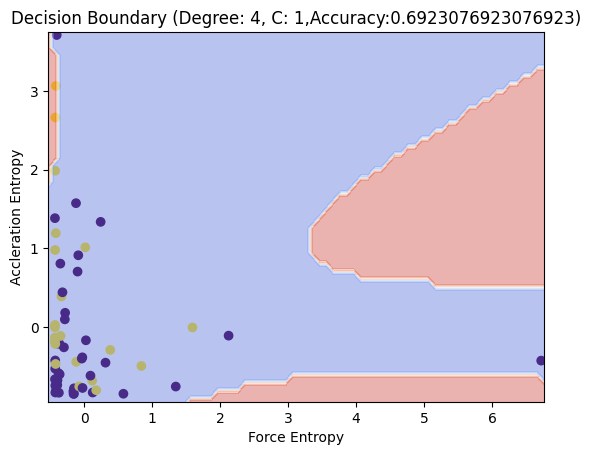

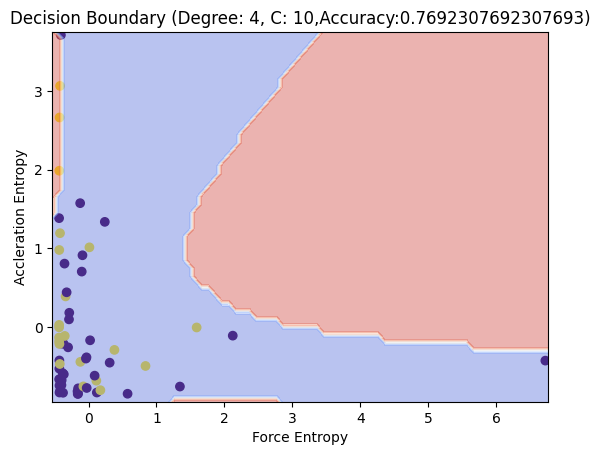

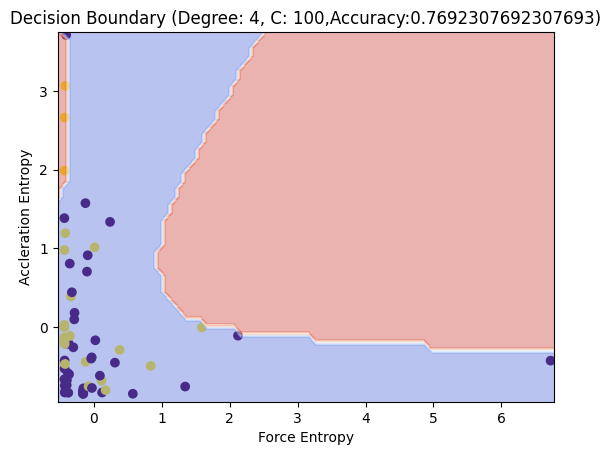

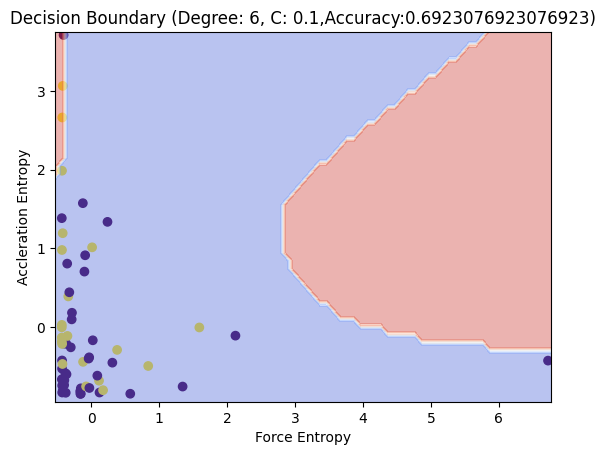

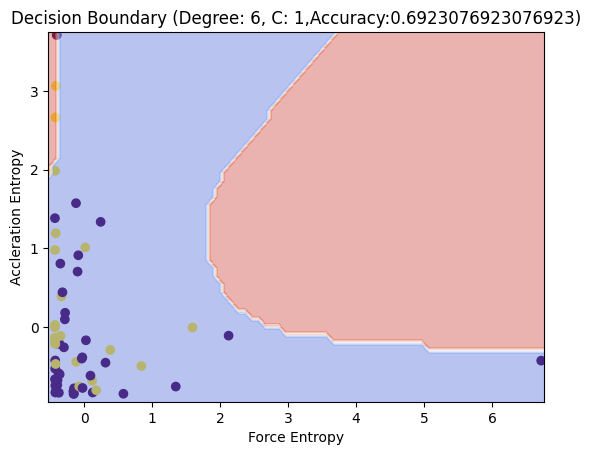

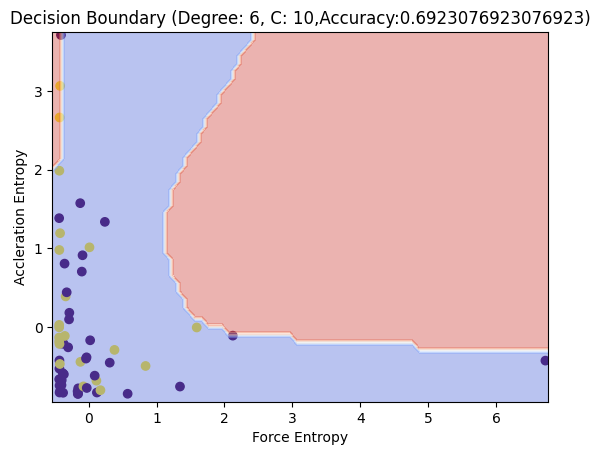

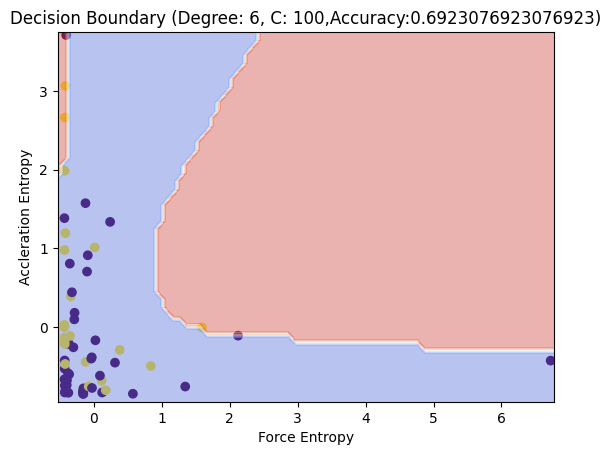

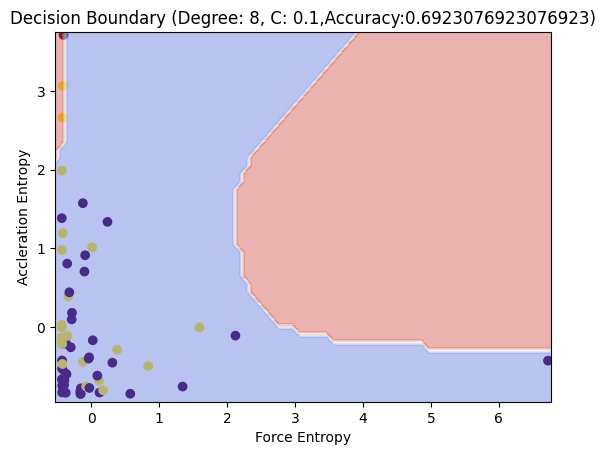

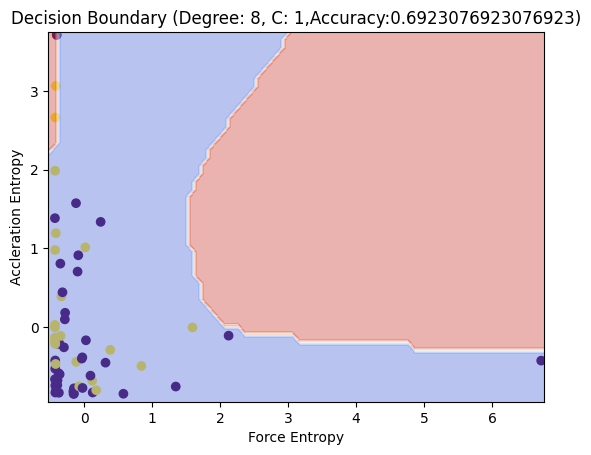

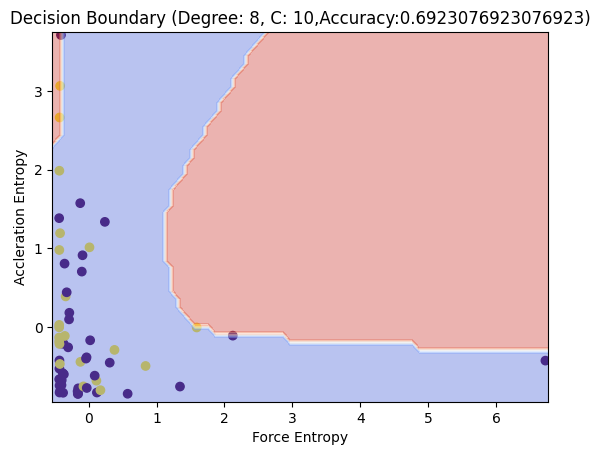

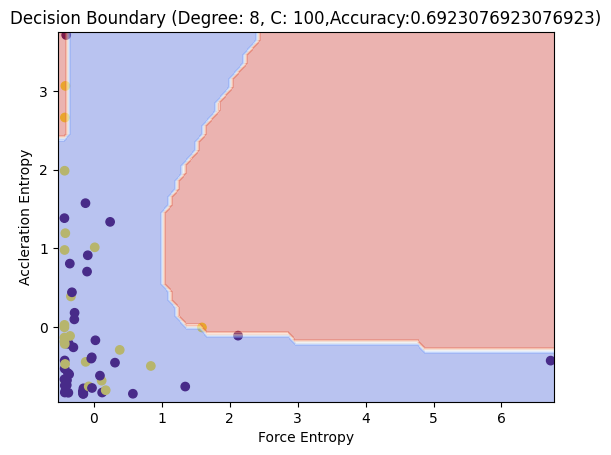

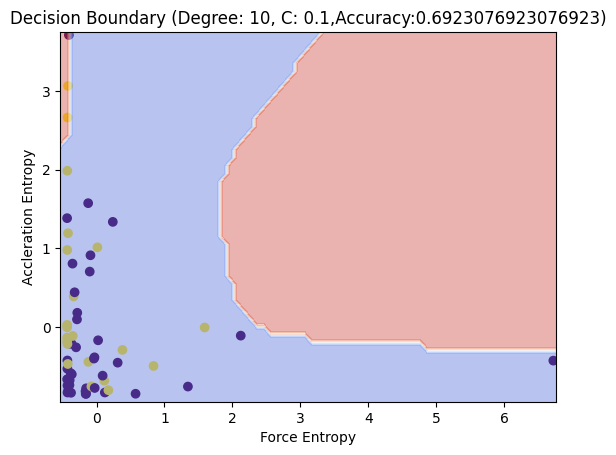

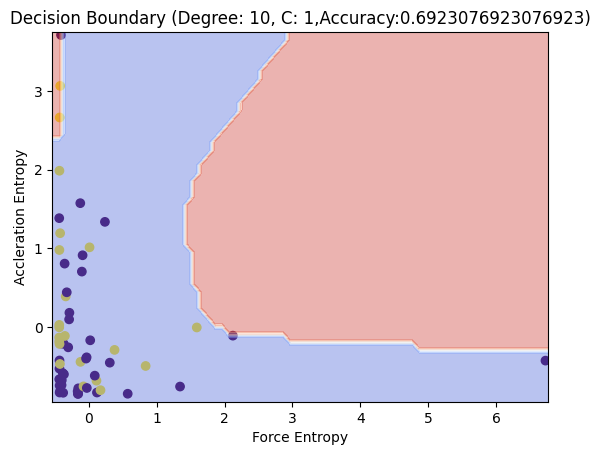

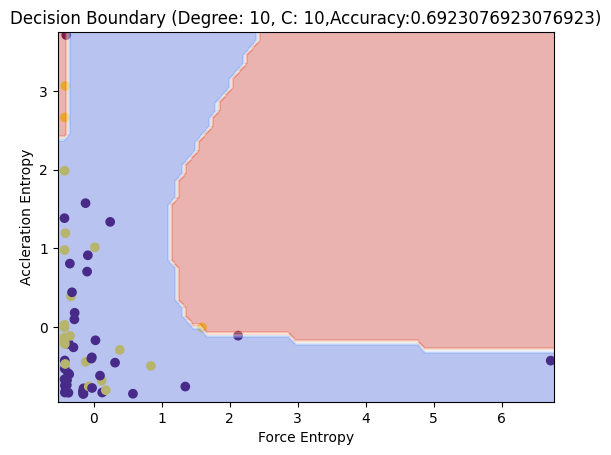

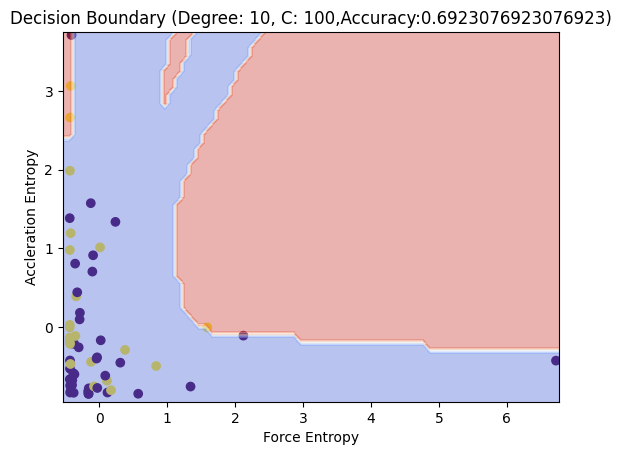

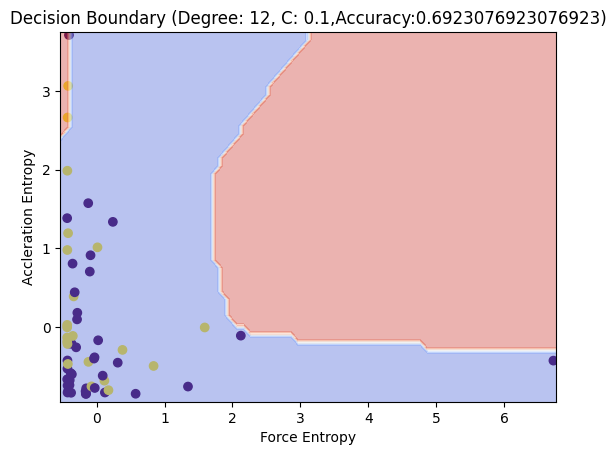

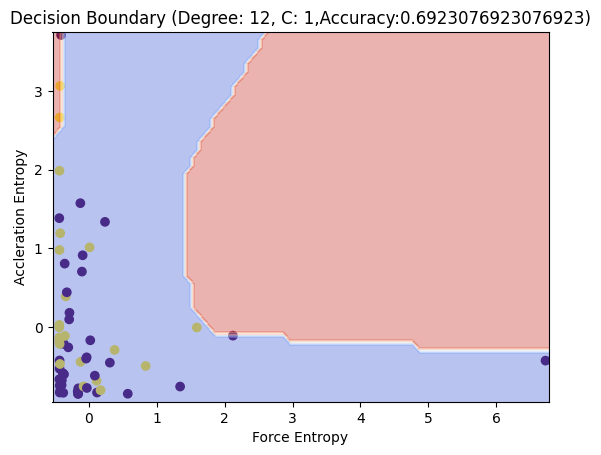

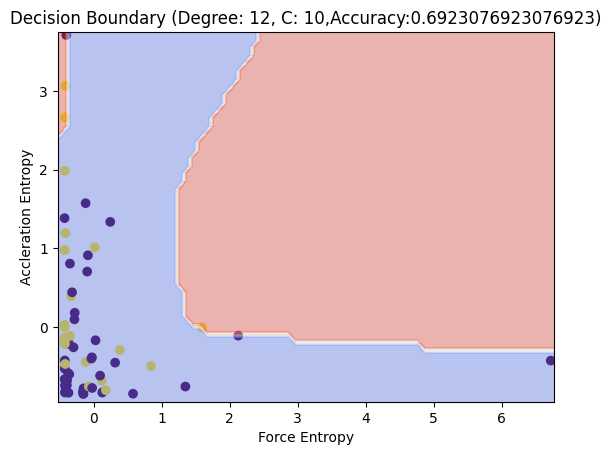

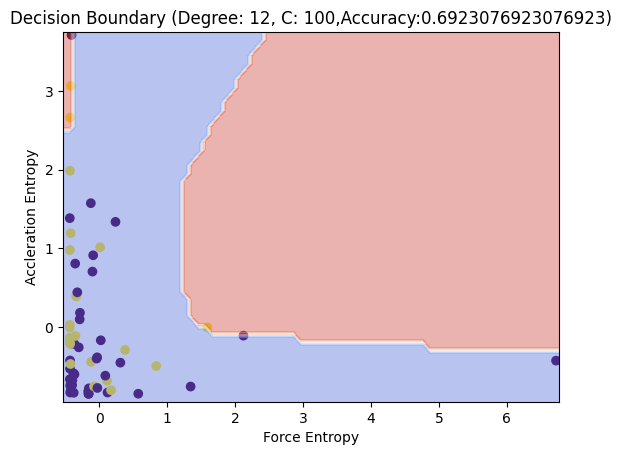

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np  # Required for mesh creation in decision boundary plot
from sklearn.metrics import accuracy_score

# Feature selection
X = df[['cut_shapefactor', 'acc_shapefactor']]
y = df['class']

# Standardize features (recommended for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
def plot_decision_boundary(X_scaled, svm, title):
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)

    # Create mesh for decision boundary visualization
    mesh_step = 0.1  # Adjust for better resolution
    xx, yy = np.meshgrid(np.arange(min(X_scaled[:, 0]) - mesh_step, max(X_scaled[:, 0]) + mesh_step, mesh_step),
                         np.arange(min(X_scaled[:, 1]) - mesh_step, max(X_scaled[:, 1]) + mesh_step, mesh_step))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    plt.title(title)
    plt.xlabel('Force Entropy')
    plt.ylabel('Accleration Entropy')
    plt.show()
degree=[1,2,4,6,8,10,12]
C=[0.1,1,10,100]
for i in degree:
  for j in C:
    svm = SVC(kernel='poly', degree=i, C=j)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    plot_decision_boundary(X_scaled, svm, f"Decision Boundary (Degree: {i}, C: {j},Accuracy:{accuracy})")

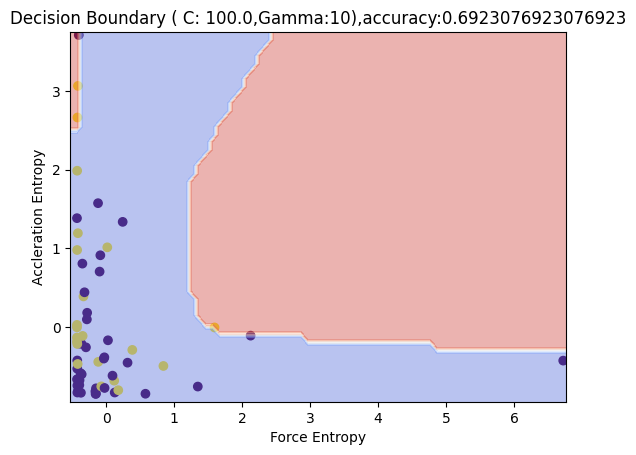

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np  # Required for mesh creation in decision boundary plot
from sklearn.metrics import accuracy_score

# Feature selection
X = df[['cut_shapefactor', 'acc_shapefactor']]
y = df['class']

# Standardize features (recommended for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hardcoded hyperparameters for SVM (poly kernel)
Gamma=10  # Choose a suitable degree based on your data
C = 100.0  # Regularization parameter

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the SVM
svm = SVC(kernel='poly', degree=12, C=C)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Plot the decision boundary (assuming 2D features)
def plot_decision_boundary(X_scaled, svm, title):
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)

    # Create mesh for decision boundary visualization
    mesh_step = 0.1  # Adjust for better resolution
    xx, yy = np.meshgrid(np.arange(min(X_scaled[:, 0]) - mesh_step, max(X_scaled[:, 0]) + mesh_step, mesh_step),
                         np.arange(min(X_scaled[:, 1]) - mesh_step, max(X_scaled[:, 1]) + mesh_step, mesh_step))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    plt.title(title)
    plt.xlabel('Force Entropy')
    plt.ylabel('Accleration Entropy')
    plt.show()

# Plot the decision boundary with the hardcoded hyperparameters
plot_decision_boundary(X_scaled, svm, f"Decision Boundary ( C: {C},Gamma:{Gamma}),accuracy:{accuracy}")



C: 0.1, Gamma: 0.1, Kernel: linear, Accuracy: 0.6153846153846154
C: 1, Gamma: 0.1, Kernel: linear, Accuracy: 0.6153846153846154
C: 10, Gamma: 0.1, Kernel: linear, Accuracy: 0.6153846153846154
C: 100, Gamma: 0.1, Kernel: linear, Accuracy: 0.7692307692307693
C: 0.1, Gamma: 1, Kernel: linear, Accuracy: 0.6153846153846154
C: 1, Gamma: 1, Kernel: linear, Accuracy: 0.6153846153846154
C: 10, Gamma: 1, Kernel: linear, Accuracy: 0.6153846153846154
C: 100, Gamma: 1, Kernel: linear, Accuracy: 0.7692307692307693
C: 0.1, Gamma: 10, Kernel: linear, Accuracy: 0.6153846153846154
C: 1, Gamma: 10, Kernel: linear, Accuracy: 0.6153846153846154
C: 10, Gamma: 10, Kernel: linear, Accuracy: 0.6153846153846154
C: 100, Gamma: 10, Kernel: linear, Accuracy: 0.7692307692307693
C: 0.1, Gamma: 100, Kernel: linear, Accuracy: 0.6153846153846154
C: 1, Gamma: 100, Kernel: linear, Accuracy: 0.6153846153846154
C: 10, Gamma: 100, Kernel: linear, Accuracy: 0.6153846153846154
C: 100, Gamma: 100, Kernel: linear, Accuracy: 0.7

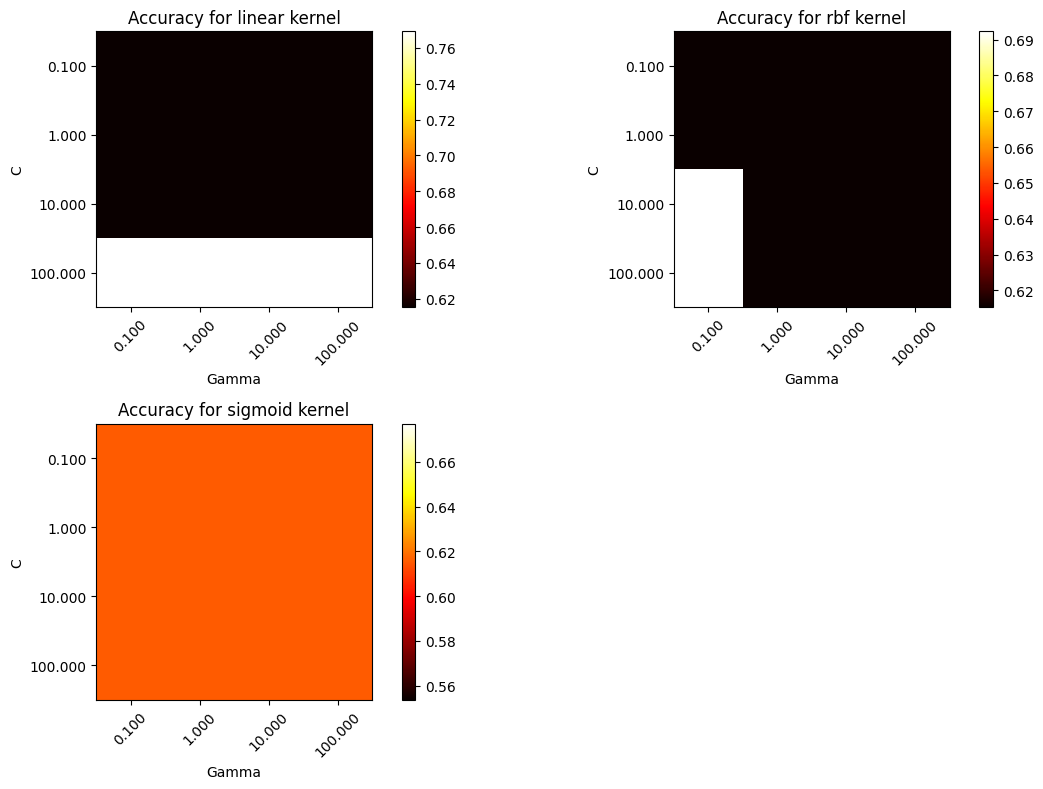

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data (replace with your actual data)
X = df[['cut_shapefactor','acc_shapefactor']]
y = df['class']  # Class labels (0, 1, 2)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter values to try
C_values = [0.1, 1, 10, 100]  # Example C values to try
gamma_values = [0.1, 1, 10, 100]  # Example gamma values to try
kernel_types = ['linear','rbf', 'sigmoid']  # Example kernel types to try

# Store accuracy values for different parameters
accuracies = np.zeros((len(C_values), len(gamma_values), len(kernel_types)))

# Loop over different parameter values

for k, kernel in enumerate(kernel_types):
    for j, gamma in enumerate(gamma_values):
       for i, C in enumerate(C_values):
            # Create the SVM classifier
            clf = svm.SVC(kernel=kernel, C=C, gamma=gamma)

            # Train the model
            clf.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = clf.predict(X_test)

            # Evaluate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            accuracies[i, j, k] = accuracy

            print(f"C: {C}, Gamma: {gamma}, Kernel: {kernel}, Accuracy: {accuracy}")

# Plot the graph
plt.figure(figsize=(12, 8))
for k, kernel in enumerate(kernel_types):
    plt.subplot(2, 2, k+1)
    plt.imshow(accuracies[:, :, k], interpolation='nearest', cmap=plt.cm.hot)
    plt.title(f'Accuracy for {kernel} kernel')
    plt.xlabel('Gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(gamma_values)), ['{:.3f}'.format(g) for g in gamma_values], rotation=45)
    plt.yticks(np.arange(len(C_values)), ['{:.3f}'.format(c) for c in C_values])
    plt.tight_layout()

plt.show()



In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming your data is in a pandas DataFrame named 'df'
X = df[['cut_skew','acc_skew']]  # Select features from columns 'cut_skew' and 'acc_skew'
y = df['class']  # Target class labels from column 'class'

X['cut_skew'].min()

-1.2475665979874755

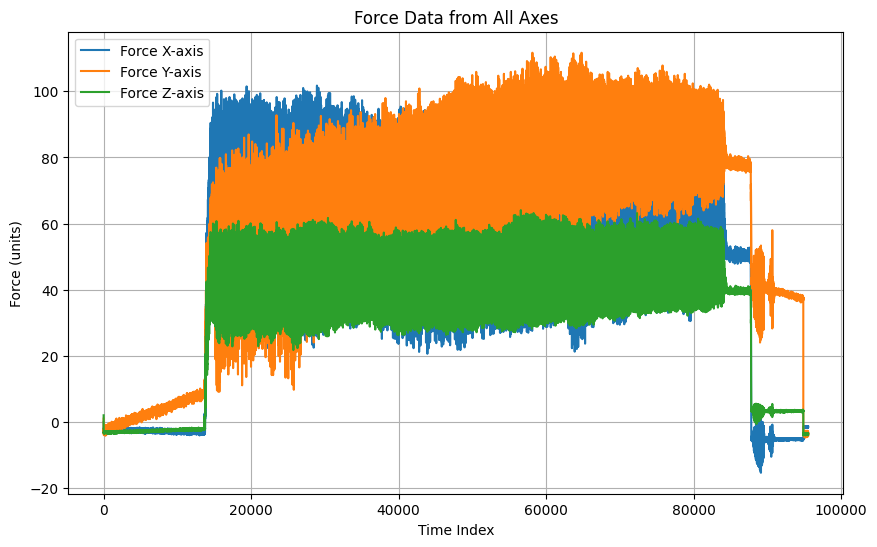

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace with your actual CSV path
cutting_force_url = '/content/drive/MyDrive/Cutting Force/Cutting Force/E1.csv'

# Read the CSV data into a DataFrame, assuming no header row
df = pd.read_csv(cutting_force_url, header=None)

# Assign descriptive names to the columns (optional)
df.columns = ["Force X-axis", "Force Y-axis", "Force Z-axis"]  # Replace with appropriate names

# Plot each force data series on the same plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for i in range(len(df.columns)):
    plt.plot(df.iloc[:, i], label=df.columns[i])  # Access data using column index

# Customize the plot
plt.xlabel("Time Index")  # Assuming data represents samples
plt.ylabel("Force (units)")  # Adjust label based on your data units
plt.title("Force Data from All Axes")
plt.legend()
plt.grid(True)  # Add grid lines for better readability

# Show the plot
plt.show()



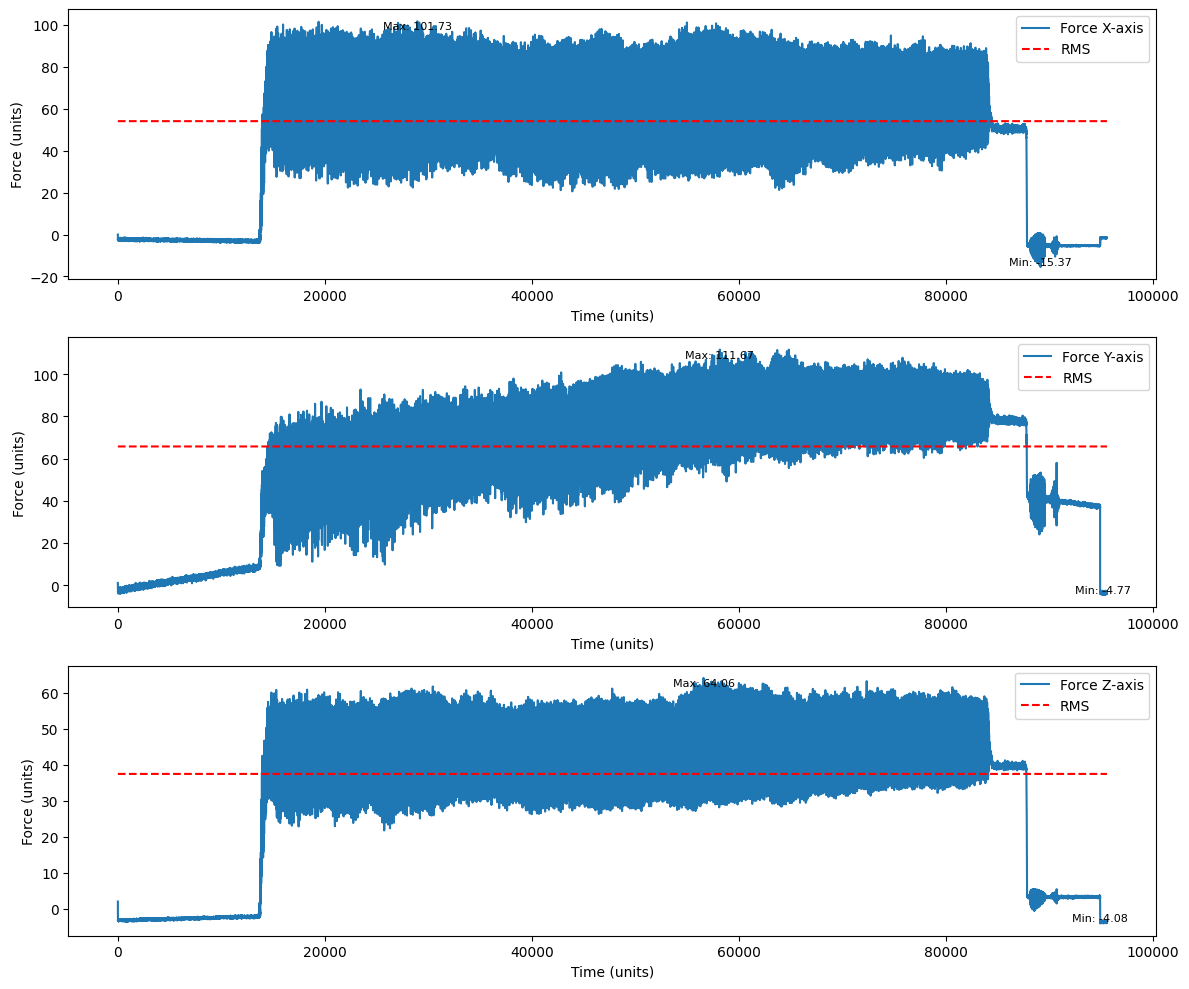

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt  # for calculating RMS

# Replace with your actual CSV path
cutting_force_url = '/content/drive/MyDrive/Cutting Force/Cutting Force/E1.csv'

# Read the CSV data into a DataFrame, assuming no header row
df = pd.read_csv(cutting_force_url, header=None)

# Assign descriptive names to the columns (optional)
df.columns = ["Force X-axis", "Force Y-axis", "Force Z-axis"]  # Replace with appropriate names

# Create the figure with a 3x1 grid of subplots
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

for i, col in enumerate(df.columns):
    data = df[col]
    rms = sqrt(data.pow(2).mean())

    # Create subplot for each data column
    plt.subplot(3, 1, i + 1)

    # Plot data and RMS line
    plt.plot(data, label=col)
    plt.plot(data.index, rms * np.ones(len(data)), color='r', linestyle='--', label='RMS')

    # Calculate and annotate max and min values
    data_max = data.max()
    data_min = data.min()
    plt.annotate(f"Max: {data_max:.2f}", xy=(data.idxmax(), data_max),
                 horizontalalignment='center', verticalalignment='top', fontsize=8)
    plt.annotate(f"Min: {data_min:.2f}", xy=(data.idxmin(), data_min),
                 horizontalalignment='center', verticalalignment='bottom', fontsize=8)

    plt.ylabel('Force (units)')
    plt.xlabel('Time (units)')  # Assuming data represents samples
    # plt.title(data_labels[i])
    plt.legend()

plt.tight_layout()  # Adjust spacing to prevent overlapping elements

# Show the plot
plt.show()
